# Chat Logs and Summaries

### Questions 1 to 2:

##### [Link to chat log](https://chatgpt.com/share/674008e8-dde0-8002-a84d-9d100941fd63)

##### Chatbot-provided summary: 
"Certainly! Here's a summary of this session:

1. **Classification Decision Trees**:  
   - These address problems where data is categorized into discrete classes using a tree structure.  
   - **Examples**: Medical diagnosis (e.g., identifying diseases), customer segmentation, fraud detection, and spam detection.  
   - They are particularly useful for interpretable, non-linear decision-making tasks.

2. **Metrics and Real-World Applications**:  
   - **Accuracy**: Useful in balanced scenarios (e.g., weather prediction, quality control).  
   - **Sensitivity**: Prioritizes true positives, critical in medical diagnosis (e.g., detecting cancer) and fraud detection.  
   - **Specificity**: Focuses on correctly identifying negatives, valuable in spam filtering and employment drug tests.  
   - **Precision**: Minimizes false positives, important in targeted marketing and obstacle detection for autonomous vehicles.

This discussion emphasized when and why specific metrics are most suitable based on real-world contexts and the implications of errors. Let me know if you'd like further clarification or additional examples!"

### Question 4:

##### [Link to chat log](https://chatgpt.com/share/6740095a-17f0-8002-92f9-3e41c3b0dd32)

##### Chatbot-provided summary: 
"Certainly! Here's a summary of this session:

1. **Understanding Data Preparation:**
   - You shared two code snippets preparing data for a `DecisionTreeClassifier`:
     - `y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']`: Encodes the target variable (`Hard_or_Paper`) into a binary format where `'H'` represents "hardcover."
     - `X = ab_reduced_noNaN[['List Price']]`: Extracts `'List Price'` as the feature.

2. **Training a Decision Tree:**
   - I provided Python code to train a `DecisionTreeClassifier` with:
     - `max_depth=2` to limit the complexity of the tree.
     - `random_state=42` for reproducibility.
     - Using `.fit(X, y)` to train the model.

3. **Explanation of the Workflow:**
   - Discussed how the target (`y`) and feature matrix (`X`) were prepared.
   - Provided details about the model setup and its purpose.

If you’d like further help with visualizing the tree, evaluating the model, or making predictions, feel free to ask!"

### Question 8:

##### [Link to chat log](https://chatgpt.com/share/674009e2-5b44-8002-b6c0-085e143d0e4c)

##### Chatbot-provided summary: 
"Here’s a summary of our chat session:  

You asked about how to visualize feature importances for scikit-learn classification decision trees. I provided the following steps:  

1. **Train a Decision Tree Model**: Use `DecisionTreeClassifier` (or another scikit-learn tree model) and train it on your dataset.  
2. **Access Feature Importances**: Use the `feature_importances_` attribute of the trained model to obtain the importance scores for each feature.  
3. **Visualize Feature Importances**: Plot the importance scores using either Matplotlib or Seaborn:
   - With Matplotlib: Create a bar chart with sorted features.
   - With Seaborn: Use a horizontal bar chart with sorted features for clarity.

You can use the same approach for ensemble models like `RandomForestClassifier` since they also have the `feature_importances_` attribute.  

Let me know if you'd like code snippets or further assistance!"

---
# Question Responses

##### Question 1:
(See chat logs)

##### Question 2:
1. Accuracy
Accuracy would be a useful measure for a model that predicts whether it will rain or not, since generally false positives and false negatives carry around the same weight in weather prediction, and accuracy simply measures the proportion of true predictions regardless of whether they are positive or negative. This means maximizing accuracy would likely be the best option compared to the other metrics.

2. Sensitivity
Sensitivity is a useful metric for medical diagnosis models, since the cost of false negatives (not detecting a true positive, which means to miss a medical issue) is high in this situation (relative to the cost of false positives, which would be to incorrectly predict a medical issue). Since sensitivity is the measure of the proportion of true positives of the actual number positives, maximizing sensitivity would minimize the number of false negatives.

3. Specificity
For a model that predicts if an email is spam, specificity would be useful to maximize, since the cost of false positives (marking a potentially important email as spam) is high compared to the cost of a false negative (not detecting a spam email). As specificity is the measure of the proportion of true negatives out of the actual number of negatives, maximizing it would minimize the number of false positives.

4. Precision
A targeted marketing model with limited resources that predicts buyers of a product would benefit from trying to maximize precision, which would minimize the number of false positives that would waste marketing resources, since precision is the proportion of actual predicted positives of the total number of predicted positives.


##### Question 3:

In [243]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

ab_reduced_noNaN = pd.read_csv("https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv", encoding="ISO-8859-1")
ab_reduced_noNaN.drop(columns=['Weight_oz', 'Width', 'Height'], inplace=True)
ab_reduced_noNaN.dropna(axis=0, inplace=True)
ab_reduced_noNaN = ab_reduced_noNaN.astype({'Pub year': int, 'NumPages': int, 'Hard_or_Paper': 'category'}) 
ab_reduced_noNaN

,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Thick
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304,Adams Media,2010,1605506249,0.8
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273,Free Press,2008,1416564195,0.7
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96,Dover Publications,1995,486285537,0.3
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672,Harper Perennial,2008,61564893,1.6
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720,Knopf,2011,307265722,1.4
...,...,...,...,...,...,...,...,...,...,...
320,Where the Sidewalk Ends,Shel Silverstein,18.99,12.24,H,192,HarperCollins,2004,60572345,1.1
321,White Privilege,Paula S. Rothenberg,27.55,27.55,P,160,Worth Publishers,2011,1429233443,0.7
322,Why I wore lipstick,Geralyn Lucas,12.95,5.18,P,224,St Martin's Griffin,2005,031233446X,0.7
323,"Worlds Together, Worlds Apart: A History of th...",Robert Tignor,97.50,97.50,P,480,W. W. Norton & Company,2010,393934942,0.9


##### Question 4:

In [244]:
np.random.seed(0)

ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(ab_reduced_noNaN, train_size=0.8)

print("Number of observations in ab_reduced_noNaN_train:\t" + str(ab_reduced_noNaN_train.shape[0]))
print("Number of observations in ab_reduced_noNaN_test:\t" + str(ab_reduced_noNaN_test.shape[0]))

Number of observations in ab_reduced_noNaN_train:	255
Number of observations in ab_reduced_noNaN_test:	64


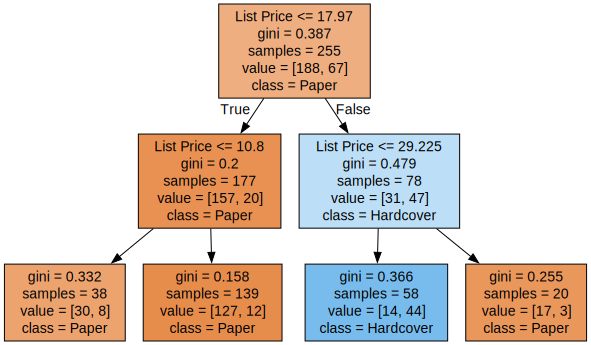

In [245]:
from sklearn.tree import DecisionTreeClassifier

y = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']
X = ab_reduced_noNaN_train[['List Price']]

# Step 1: Define the model with a maximum depth of 2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Step 2: Train the model using the feature matrix X and target vector y
clf.fit(X, y)

# The model is now trained and ready for predictions

# tree.plot_tree(clf)
# tree.plot_tree(clf, filled=True, feature_names=['List Price'], class_names=['Paper', 'Hardcover'])

graph = gv.Source(tree.export_graphviz(clf, out_file=None, filled=True, feature_names=['List Price'], class_names=['Paper', 'Hardcover'])) 
graph
# print(ab_reduced_noNaN_test[['Hard_or_Paper', 'List Price']].to_string())
# print(pd.DataFrame(clf.predict(ab_reduced_noNaN_test[['List Price']]), pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']).to_string())

This fitted classification decision tree predicts whether a book is hardcover or paperback from its list price. The first decision rule is if the list price is less than or equal to 17.97. If it is, the next decision rule is if it's less than or equal to 29.225, while if it isn't, the next rule is if it's less than or equal to 10.8. The decision tree has 4 leaf nodes, which each correspond to the intervals $(-\infty, 10.8]$, $(10.8, 17.97]$, $(17.97, 29.225]$, and $(29.225, \infty)$, with 3 of the 4 intervals resulting in the prediction that the book's cover is paper.

##### Question 5:

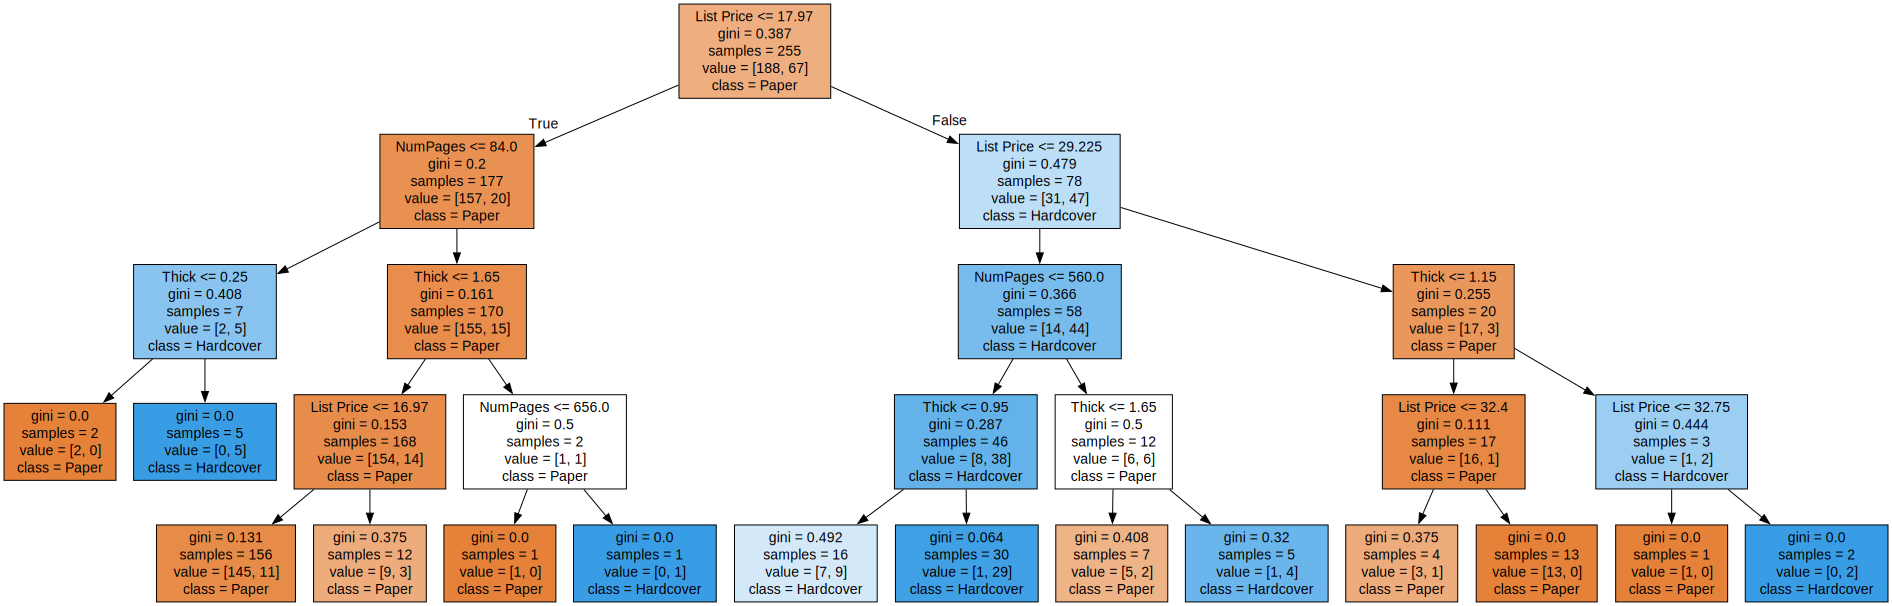

In [246]:
features = ['NumPages', 'Thick', 'List Price']
y2 = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']
X2 = ab_reduced_noNaN_train[features]

clf2 = DecisionTreeClassifier(max_depth=4, random_state=0)
clf2.fit(X2, y2)

gv.Source(tree.export_graphviz(clf2, out_file=None, filled=True, feature_names=features, class_names=['Paper', 'Hardcover'])) 

This classification decision tree predicts whether a given book is hardcover or paperback based on its number of pages, thickness, and list price. It predicts the class by testing it through a series of decision rules based on these features.

##### Question 6:

In [247]:
# Predict on the test set
# y_pred = clf.predict(cancer_df.iloc[testing_indices, :])

# confusion matrix for clf
conf_1 = confusion_matrix(pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H'], clf.predict(ab_reduced_noNaN_test[['List Price']]))

# confusion matrix for clf2
conf_2 = confusion_matrix(pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H'], clf2.predict(ab_reduced_noNaN_test[features]))

def metrics(conf):
    tn = conf[0, 0]
    fp = conf[1, 0]
    fn = conf[0, 1]
    tp = conf[1, 1]
    return {'sensitivity' : tp/(tp+fn), 'specificity' : tn/(tn+fp), 'accuracy' : (tp+tn)/(tp+tn+fp+fn)}

metrics_1 = metrics(conf_1)
metrics_2 = metrics(conf_2)

for metrics in [metrics_1, metrics_2]:
    for k, v in metrics.items():
        metrics[k] = np.round(v, 3)
                       
print('clf:')
print("confusion matrix:\n" + str(conf_1) + '\n')
print('confusion matrix metrics:\n' + str(metrics_1))

print()

print('clf2:')
print("confusion matrix:\n" + str(conf_2) + '\n')
print('confusion matrix metrics:\n' + str(metrics_2))

clf:
confusion matrix:
[[40  5]
 [ 8 11]]

confusion matrix metrics:
{'sensitivity': 0.688, 'specificity': 0.833, 'accuracy': 0.797}

clf2:
confusion matrix:
[[40  5]
 [ 5 14]]

confusion matrix metrics:
{'sensitivity': 0.737, 'specificity': 0.889, 'accuracy': 0.844}


##### Question 7:
The differences between the two confusion matrices below is that one uses one feature variable, while the other uses three, and also clf2 (the original decision tree which used 3 features) has a max depth of 4 instead of 2.

The reason why the two confusion matrices above are better is that they use `ab_reduced_noNaN_test`, which is the out-of-sample data intended to be used to test the model, while the confusion matrices below use `ab_reduced_noNaN_train`, which is the in-sample subset of data that was used to train the classification decision tree. This means the above confusion matrices are visualizations of the model's ability to generalize out-of-sample while the ones below are only testing the model on data it has already seen. 

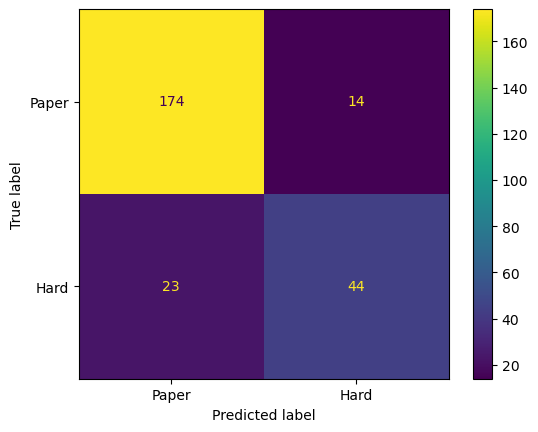

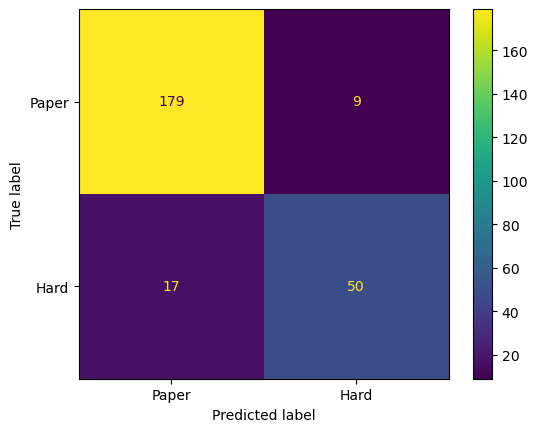

In [248]:
ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train["Hard_or_Paper"]=='H', 
                     clf.predict(ab_reduced_noNaN_train[['List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()

ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train["Hard_or_Paper"]=='H', 
                     clf2.predict(
                         ab_reduced_noNaN_train[['NumPages','Thick','List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()

##### Question 8:
List price is the most important predictor variable for making predictions according to clf2.

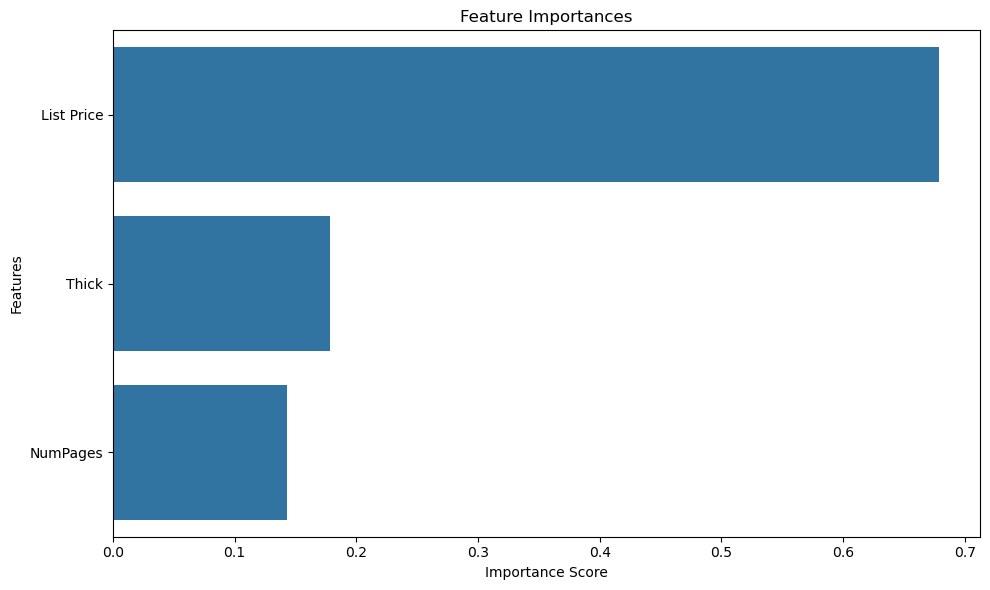

In [249]:
import matplotlib.pyplot as plt

importances = clf2.feature_importances_

# Prepare data for seaborn
importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

##### Question 9:
It is overall much simpler to interpret the meaning of a linear regression model's coefficients than it is to examine the effect of the features of a decision tree on the outcome, as looking at the equation of the linear model is enough to provide intuitive insight into what effect each coefficient has on the outcome variable (assuming one has a basic understanding of linear relations). On the other hand, decision trees can involve many features interacting in complex ways, so feature importances allow for a much more general insight into how the predictors produce an outcome by acting as easily-understandable measures of each feature's weight in the process.

##### Question 10:
Somewhat.